In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import graphviz
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report,precision_recall_fscore_support, confusion_matrix,accuracy_score,ConfusionMatrixDisplay
from IPython.display import Image

In [39]:
X_1=np.random.normal(5,2,100)
df1= pd.DataFrame(X_1)
df1['Class']=np.repeat(0 ,100)
df1.columns=['Values','Class']

In [40]:
X_2= np.random.normal(-5,2,100)
df2=pd.DataFrame(X_2)
df2['Class']=np.repeat(1 ,100)
df2.columns=['Values','Class']

In [41]:
df_append=df1.append(df2,ignore_index=True)
df_append

,Values,Class
0,5.439352,0
1,4.741758,0
2,8.755134,0
3,7.470304,0
4,5.110848,0
...,...,...
195,-7.229145,1
196,-3.604514,1
197,-5.545430,1
198,-4.929416,1


In [42]:
X=df_append['Values']
Y=df_append['Class']
X = X.values.reshape(-1,1)

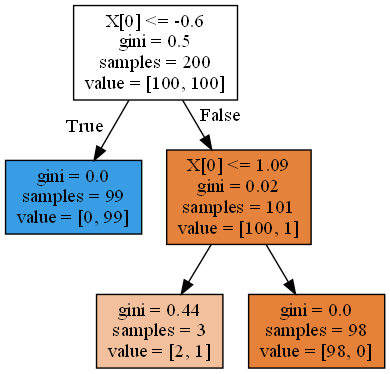

In [43]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth =2, min_samples_split=5, min_samples_leaf=2)
dtc.fit(X,Y)
y_pred =dtc.predict(X)

from sklearn.tree import export_graphviz
export_graphviz(dtc, out_file='tree_limited.dot',max_depth=5,
                rounded = False, proportion = False, precision = 2, filled = True)
!dot -Tpng tree_limited.dot -o prob4.png -Gdpi=100
Image(filename = 'prob4.png')

In [44]:
df_append.describe()

,Values,Class
count,200.000000,200.000000
mean,0.028691,0.500000
std,5.523450,0.501255
min,-11.021485,0.000000
25%,-5.153493,0.000000
50%,0.341702,0.500000
75%,5.179807,1.000000
max,10.014773,1.000000


### Threshold value  of feature at first split is 0.47. Comparing this to empirical distribution, we observe that the threshhold value is very close to median  and will be between median and minimum